In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
measure_data = pd.read_csv('/content/measures-as-defined.csv')
Commodities_data = pd.read_csv('/content/commodities-report.csv')
MSC_data = pd.read_csv('/content/measures-on-declarable-commodities (1).csv')

In [ ]:
chunk_size = 100000

# Function to process each chunk
def process(chunk):
    return chunk

# List to store temporary file names
processed_chunks = []

# Step 1: Process data in chunks and save to temporary files
for i, chunk in enumerate(pd.read_csv('/content/measures-on-declarable-commodities (1).csv', chunksize=chunk_size)):
    processed_chunk = process(chunk)
    temp_filename = f'processed_chunk_{i}.csv'
    processed_chunk.to_csv(temp_filename, index=False)
    processed_chunks.append(temp_filename)

In [ ]:
# Step 2: Combine processed chunks
dataframes = []

for temp_filename in processed_chunks:
    df_chunk = pd.read_csv(temp_filename)
    dataframes.append(df_chunk)

MSC_data = pd.concat(dataframes, ignore_index=True)
MSC_data.to_csv('final_combined_dataset.csv', index=False)

In [ ]:
# Step 3: Load the combined dataset
MSC_data = pd.read_csv('final_combined_dataset.csv')

# Verify the loaded data
print(MSC_data.head())
print(MSC_data.info())


   id  commodity__sid  commodity__code  commodity__indent  \
0   1           93796        101210000                  2   
1   2           93796        101210000                  2   
2   3           93796        101210000                  2   
3   4           93796        101210000                  2   
4   5           93796        101210000                  2   

       commodity__description  measure__sid  measure__type__id  \
0  Pure-bred breeding animals      20000000                103   
1  Pure-bred breeding animals      20184077                103   
2  Pure-bred breeding animals      20125835                142   
3  Pure-bred breeding animals      20079764                142   
4  Pure-bred breeding animals      20234871                142   

  measure__type__description measure__additional_code__code  \
0         Third country duty                            NaN   
1         Third country duty                            NaN   
2          Tariff preference                   

In [ ]:
MSC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098899 entries, 0 to 1098898
Data columns (total 24 columns):
 #   Column                                              Non-Null Count    Dtype  
---  ------                                              --------------    -----  
 0   id                                                  1098899 non-null  int64  
 1   commodity__sid                                      1098899 non-null  int64  
 2   commodity__code                                     1098899 non-null  int64  
 3   commodity__indent                                   1098899 non-null  int64  
 4   commodity__description                              1098899 non-null  object 
 5   measure__sid                                        1098899 non-null  int64  
 6   measure__type__id                                   1098899 non-null  int64  
 7   measure__type__description                          1098899 non-null  object 
 8   measure__additional_code__code                      

In [ ]:
measure_data

,id,commodity__sid,commodity__code,commodity__indent,commodity__description,measure__sid,measure__type__id,measure__type__description,measure__additional_code__code,measure__additional_code__description,...,measure__footnotes,measure__conditions,measure__geographical_area__sid,measure__geographical_area__id,measure__geographical_area__description,measure__excluded_geographical_areas__ids,measure__excluded_geographical_areas__descriptions,measure__quota__order_number,measure__regulation__id,measure__regulation__url
0,1,27623,100000000,0,LIVE ANIMALS,20184077,103,Third country duty,NaN,NaN,...,NaN,NaN,505,1080,Channel Islands,NaN,NaN,NaN,S.I. 2020/1430,https://www.legislation.gov.uk/uksi/2020/1430
1,2,27623,100000000,0,LIVE ANIMALS,20125835,142,Tariff preference,NaN,NaN,...,NaN,NaN,349,1013,European Union,NaN,NaN,NaN,NaN,NaN
2,3,27623,100000000,0,LIVE ANIMALS,20079764,142,Tariff preference,NaN,NaN,...,NaN,NaN,351,1033,CARIFORUM,NaN,NaN,NaN,NaN,NaN
3,4,27623,100000000,0,LIVE ANIMALS,20234871,142,Tariff preference,NaN,NaN,...,NaN,NaN,455,1034,Eastern and Southern Africa States,KM|MG,Comoros|Madagascar,NaN,NaN,NaN
4,5,27623,100000000,0,LIVE ANIMALS,20079954,142,Tariff preference,NaN,NaN,...,NaN,NaN,468,1035,SADC EPA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84923,84924,84894,9880840000,1,Classified in Chapter 84,20233381,724,Import control of fluorinated greenhouse gases,NaN,NaN,...,NaN,"condition:B,certificate:Y054,action:26|conditi...",400,1011,ERGA OMNES,NaN,NaN,NaN,517/2014,https://www.legislation.gov.uk/eur/2014/517
84924,84925,84895,9880850000,1,Classified in Chapter 85,20233382,724,Import control of fluorinated greenhouse gases,NaN,NaN,...,NaN,"condition:B,certificate:Y054,action:26|conditi...",400,1011,ERGA OMNES,NaN,NaN,NaN,517/2014,https://www.legislation.gov.uk/eur/2014/517
84925,84926,93473,9905000000,1,Personal property belonging to natural persons...,20192037,103,Third country duty,NaN,NaN,...,NaN,NaN,400,1011,ERGA OMNES,NaN,NaN,NaN,2020/1430,NaN
84926,84927,93473,9905000000,1,Personal property belonging to natural persons...,20228418,103,Third country duty,NaN,NaN,...,NaN,NaN,505,1080,Channel Islands,NaN,NaN,NaN,2020/1430,NaN


In [ ]:
cols = ['commodity__code','measure__sid','measure__type__description','commodity__indent']
df1 = measure_data[cols]

In [ ]:
cols2 = ['commodity__code','commodity__suffix','commodity__validity_start','commodity__sid','commodity__description']
df2 = Commodities_data[cols2]

In [ ]:
merged_df = pd.merge(df1, df2, on='commodity__code', how='inner')
merged_df

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description
0,100000000,20184077,Third country duty,0,80,1971-12-31,27623,LIVE ANIMALS
1,100000000,20125835,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
2,100000000,20079764,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
3,100000000,20234871,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
4,100000000,20079954,Tariff preference,0,80,1971-12-31,27623,LIVE ANIMALS
...,...,...,...,...,...,...,...,...
101403,9905000000,20192037,Third country duty,1,10,2011-01-01,93477,"Certain goods, as provided for in Council Regu..."
101404,9905000000,20192037,Third country duty,1,80,2011-01-01,93473,Personal property belonging to natural persons...
101405,9905000000,20228418,Third country duty,1,10,2011-01-01,93477,"Certain goods, as provided for in Council Regu..."
101406,9905000000,20228418,Third country duty,1,80,2011-01-01,93473,Personal property belonging to natural persons...


In [ ]:
cols3 = ['commodity__code','measure__geographical_area__sid','measure__geographical_area__description','measure__duty_expression']
df3 = MSC_data[cols3]

In [ ]:
merged_df1 = pd.merge(merged_df, df3,  on='commodity__code', how='inner')
merged_df1.dropna(inplace=True)
merged_df1.drop_duplicates(inplace=True)

In [ ]:
MSC_data_cleaned = merged_df1.iloc[1:1500000]

In [ ]:
# Use the isin() method to check for multiple values
african_countries = ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon",
               "Central African Republic", "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea",
               "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau",
               "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania",
               "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe",
               "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania",
               "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]
MFN_africa_trade = MSC_data_cleaned[MSC_data_cleaned['measure__geographical_area__description'].isin(african_countries)]

In [ ]:
MFN_africa_trade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212431 entries, 13 to 1709775
Data columns (total 11 columns):
 #   Column                                   Non-Null Count   Dtype 
---  ------                                   --------------   ----- 
 0   commodity__code                          212431 non-null  int64 
 1   measure__sid                             212431 non-null  int64 
 2   measure__type__description               212431 non-null  object
 3   commodity__indent                        212431 non-null  int64 
 4   commodity__suffix                        212431 non-null  int64 
 5   commodity__validity_start                212431 non-null  object
 6   commodity__sid                           212431 non-null  int64 
 7   commodity__description                   212431 non-null  object
 8   measure__geographical_area__sid          212431 non-null  int64 
 9   measure__geographical_area__description  212431 non-null  object
 10  measure__duty_expression                 212431

In [ ]:
MFN_africa_trade['commodity__code'] = MFN_africa_trade['commodity__code'].astype('int32')
MFN_africa_trade['measure__sid'] = MFN_africa_trade['measure__sid'].astype('int32')
MFN_africa_trade['commodity__indent'] = MFN_africa_trade['commodity__indent'].astype('int32')
MFN_africa_trade['commodity__suffix'] = MFN_africa_trade['commodity__suffix'].astype('int32')
MFN_africa_trade['commodity__sid'] = MFN_africa_trade['commodity__sid'].astype('int32')
MFN_africa_trade['measure__geographical_area__sid'] = MFN_africa_trade['measure__geographical_area__sid'].astype('int32')
MFN_africa_trade['measure__duty_expression'] = MFN_africa_trade['measure__duty_expression'].astype('str')

In [ ]:
# Extract and convert percentages, ignoring non-percentage components
MFN_africa_trade['measure__duty_expression'] = (
    MFN_africa_trade['measure__duty_expression']
    .str.extract(r'(\d+)%')  # Extract the number before '%'
    .astype(float) / 100  # Convert to float, handle non-numeric with 'ignore'
).fillna(0)

In [ ]:
MFN_africa_trade['measure__duty_expression'].unique()

array([0.  , 0.01, 0.05, 0.07, 0.02, 0.08, 0.06, 0.04, 0.09, 0.03, 0.14,
       0.2 , 0.12, 0.1 , 0.11, 0.15])

In [ ]:
MFN_africa_trade.sample(5)

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description,measure__geographical_area__sid,measure__geographical_area__description,measure__duty_expression
1592225,-1391527286,20232839,Import control of fluorinated greenhouse gases,3,80,2022-01-01,107034,Pentafluoroethane (CAS RN 354-33-6),385,Ivory Coast,0.0
686743,1104229500,20001450,Third country duty,3,80,2012-01-01,94663,Other,109,Egypt,0.0
1466544,-1584766175,20042299,Definitive anti-dumping duty,5,10,2012-01-01,95259,Blends containing by weight more than 20% of f...,385,Ivory Coast,0.0
837262,1604149000,20084181,Tariff preference,3,80,1972-01-01,32824,Bonito (Sarda spp.),385,Ivory Coast,0.0
390807,305720035,20219891,"Control on illegal, unreported and unregulated...",5,80,2012-01-01,97268,Unsalted,211,Ghana,0.0


In [ ]:
MFN_africa_trade['commodity__validity_start'] = pd.to_datetime(MFN_africa_trade['commodity__validity_start'])

In [ ]:

MFN_africa_trade['commodity__validity_year'] = pd.to_datetime(MFN_africa_trade['commodity__validity_start']).dt.year


In [ ]:
MFN_africa_trade.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212431 entries, 13 to 1709775
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   commodity__code                          212431 non-null  int32         
 1   measure__sid                             212431 non-null  int32         
 2   measure__type__description               212431 non-null  object        
 3   commodity__indent                        212431 non-null  int32         
 4   commodity__suffix                        212431 non-null  int32         
 5   commodity__validity_start                212431 non-null  datetime64[ns]
 6   commodity__sid                           212431 non-null  int32         
 7   commodity__description                   212431 non-null  object        
 8   measure__geographical_area__sid          212431 non-null  int32         
 9   measure__geographical_area__d

In [ ]:
MFN_africa_trade.sample(5)

,commodity__code,measure__sid,measure__type__description,commodity__indent,commodity__suffix,commodity__validity_start,commodity__sid,commodity__description,measure__geographical_area__sid,measure__geographical_area__description,measure__duty_expression,commodity__validity_year
450700,308901000,20000789,Third country duty,2,80,2012-01-01,95530,"Live, fresh or chilled",211,Ghana,0.0,2012
371733,305598540,20099104,Restriction on entry into free circulation,4,80,2017-01-01,100672,Atlantic bluefin tuna (Thunnus thynnus),159,Morocco,0.0,2017
807236,1520000000,20178636,Tariff preference,0,80,1972-01-01,32635,"Glycerol, crude; glycerol waters and glycerol ...",159,Morocco,0.0,1972
1357037,-1992666296,20125352,Non preferential tariff quota,2,80,1972-01-01,35137,Of which the starch content does not exceed 28...,260,Cameroon,0.0,1972
447087,308120000,20219986,"Control on illegal, unreported and unregulated...",2,80,2017-01-01,100886,Frozen,260,Cameroon,0.0,2017


In [ ]:

MFN_africa_trade_Egypt = MFN_africa_trade[MFN_africa_trade['measure__geographical_area__description'].isin(['Cameroon', 'Egypt', 'Ghana'])]


# ***Data Visualization***

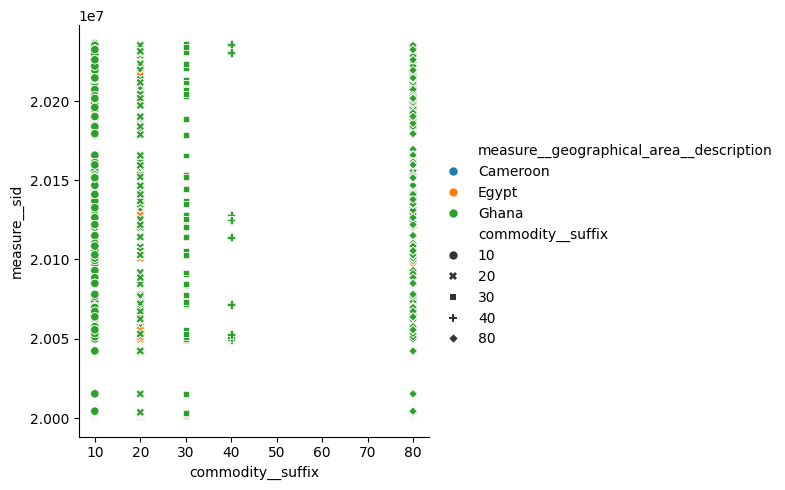

In [ ]:

sns.relplot(data = MFN_africa_trade_Egypt, kind = 'scatter', x = 'commodity__suffix', y = 'measure__sid', hue = 'measure__geographical_area__description',style = 'commodity__suffix' )

(array([23450.,     0.,     0.,   444.,  7109.,  4727.,  3732., 26113.,
        12128.,  6687.]),
 array([1972. , 1977.2, 1982.4, 1987.6, 1992.8, 1998. , 2003.2, 2008.4,
        2013.6, 2018.8, 2024. ]),
 <BarContainer object of 10 artists>)

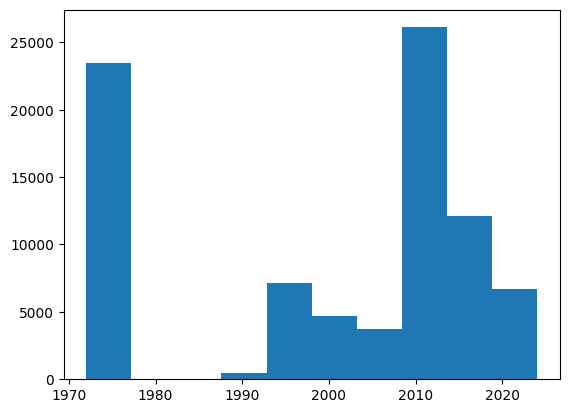

In [ ]:
plt.hist(MFN_africa_trade_Egypt['commodity__validity_year'])

<Axes: >

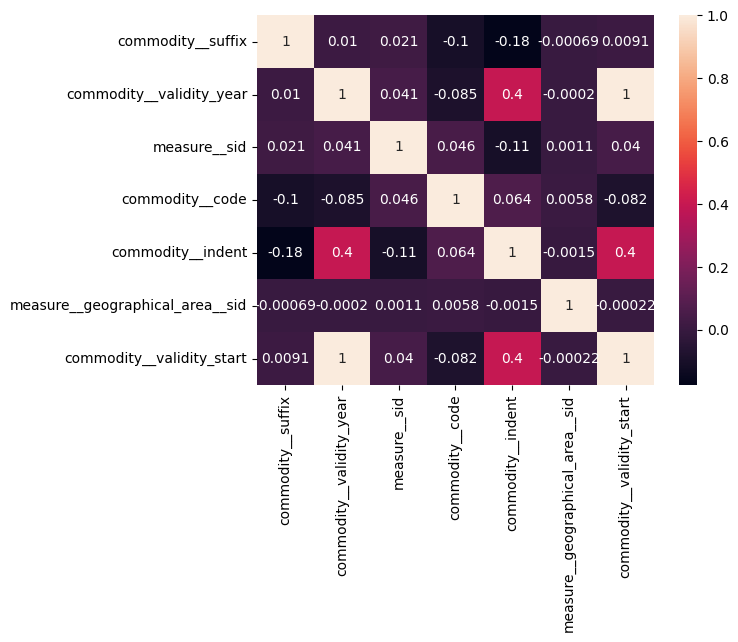

In [ ]:

sns.heatmap(MFN_africa_trade_Egypt[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']].corr(),annot = True)

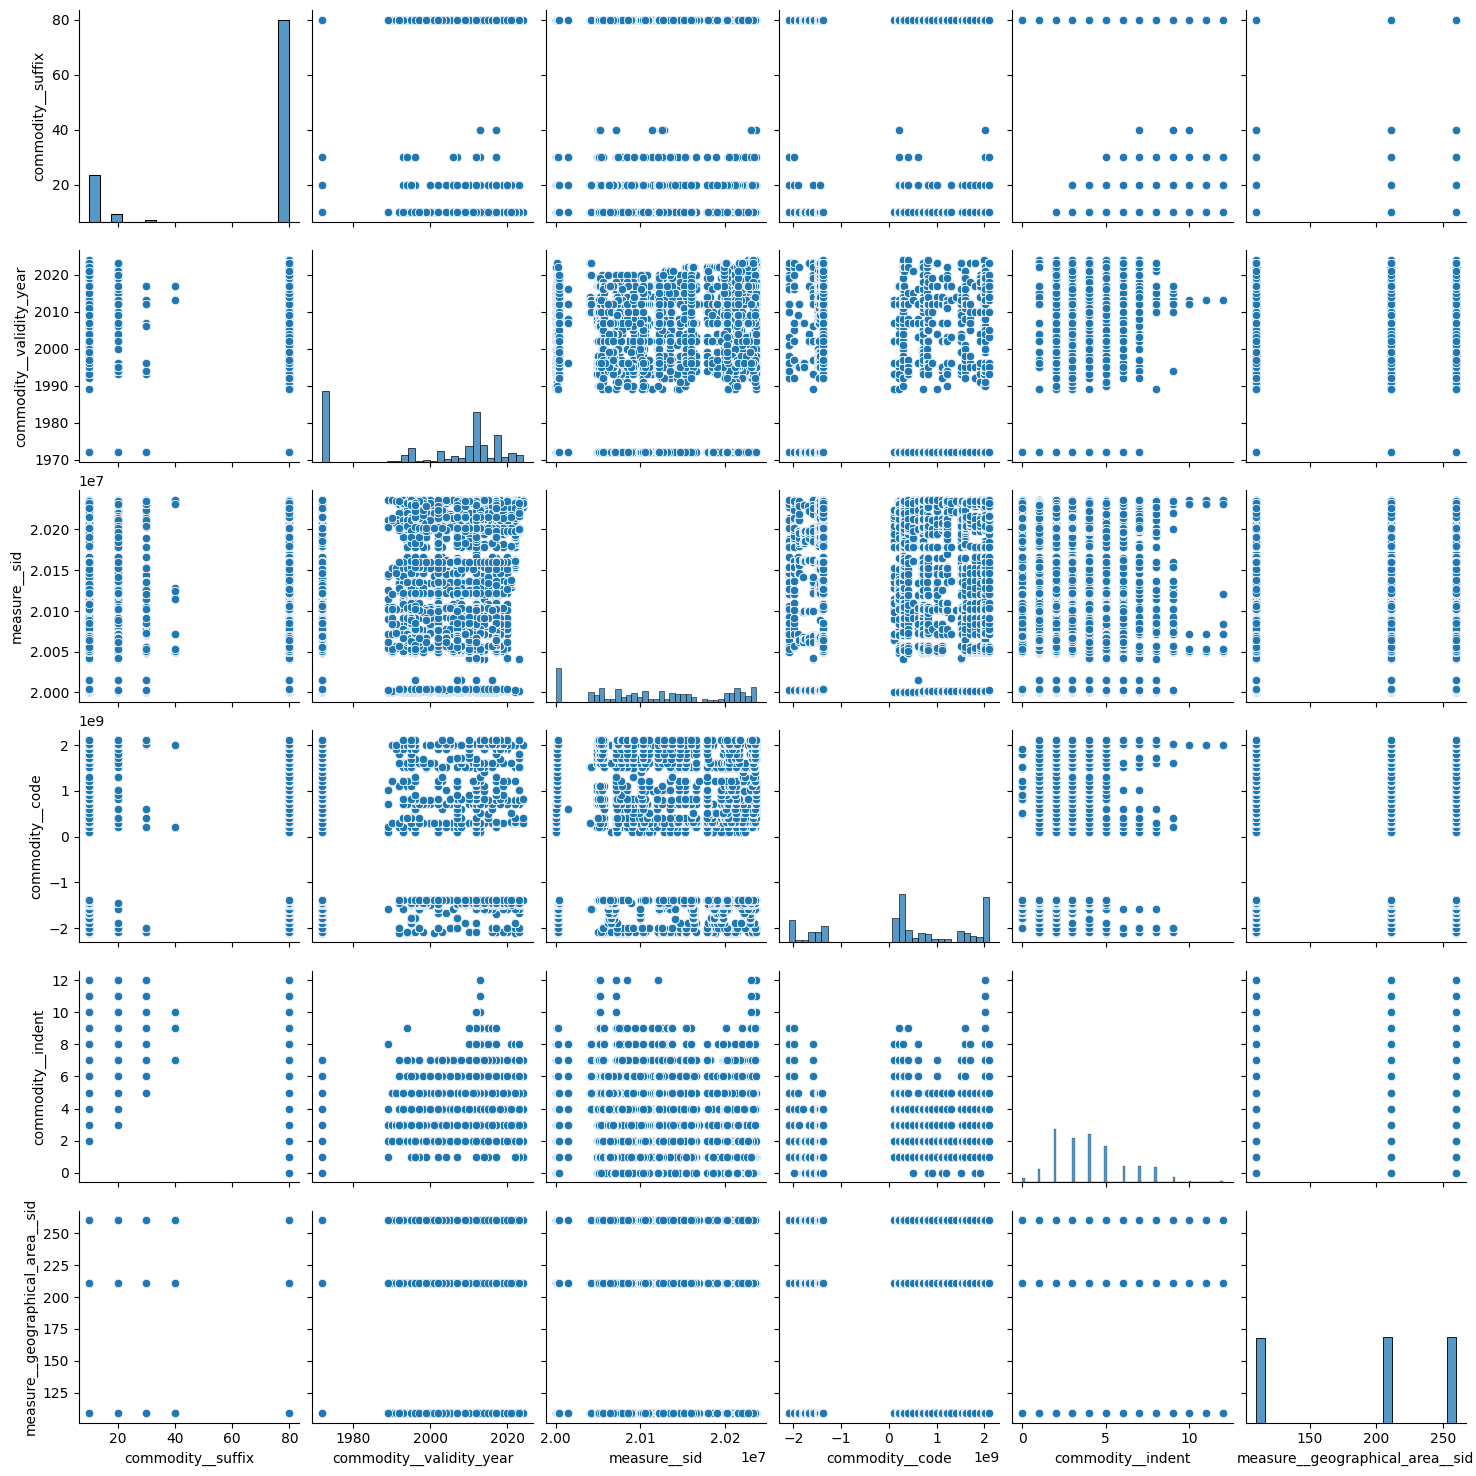

In [ ]:
sns.pairplot(MFN_africa_trade_Egypt[['commodity__suffix','commodity__validity_year', 'measure__sid', 'commodity__code', 'commodity__indent', 'measure__geographical_area__sid','commodity__validity_start']])

In [ ]:
if 'commodity__validity_year' in MFN_africa_trade.columns:
    MFN_africa_trade['commodity__validity_year'] = pd.to_datetime(MFN_africa_trade['commodity__validity_year'], format='%Y')

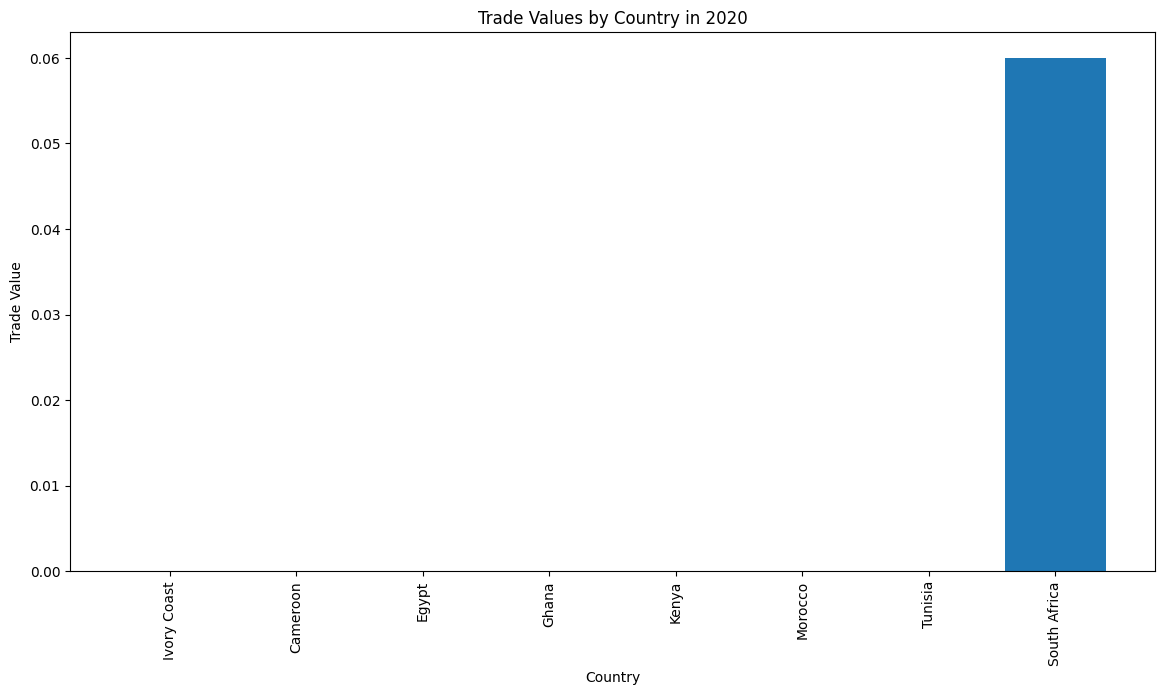

In [ ]:
# 2. Bar Chart: Trade values by country for a specific year
specific_year = 2020
year_data = MFN_africa_trade[MFN_africa_trade['commodity__validity_year'].dt.year == specific_year]
plt.figure(figsize=(14, 7))
plt.bar(year_data['measure__geographical_area__description'], year_data['measure__duty_expression'])
plt.title(f'Trade Values by Country in {specific_year}')
plt.xlabel('Country')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

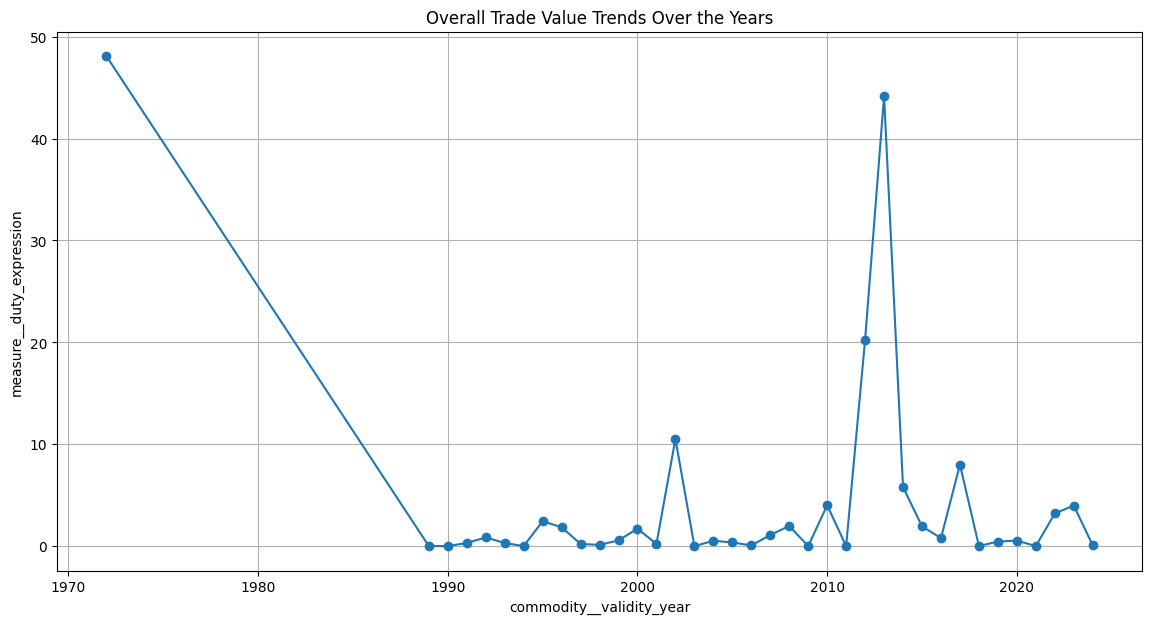

In [ ]:


# 1. Line Chart: Overall trade value trends over the years
annual_trade_value = MFN_africa_trade.groupby(MFN_africa_trade['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o')
plt.title('Overall Trade Value Trends Over the Years')
plt.xlabel('commodity__validity_year')
plt.ylabel('measure__duty_expression')
plt.grid(True)
plt.show()

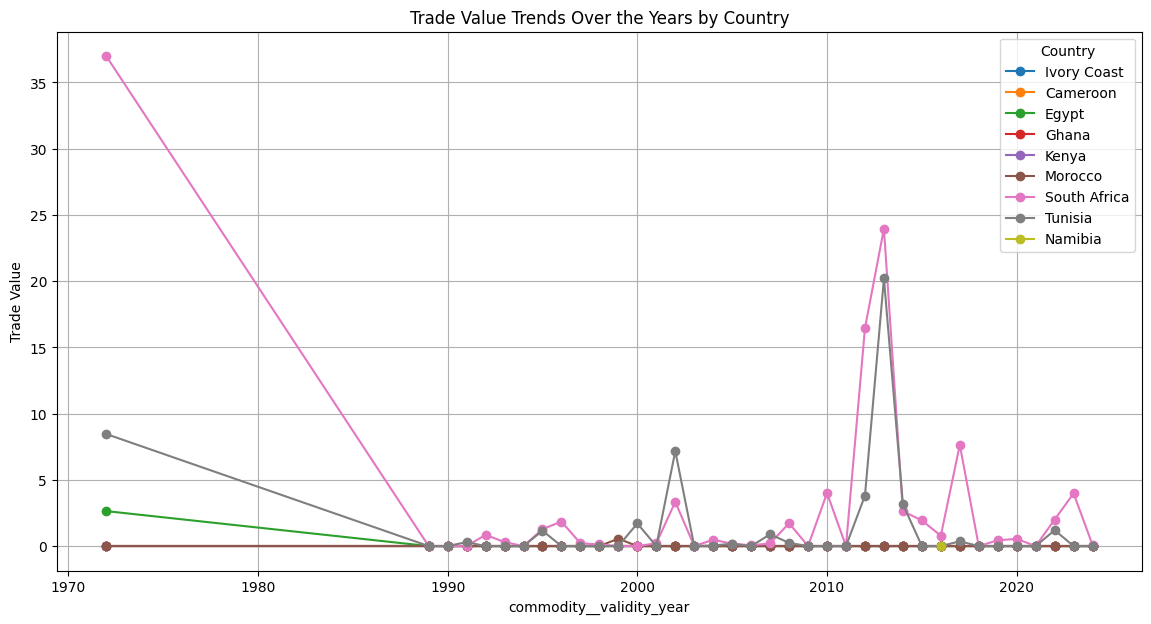

In [ ]:
# 1. Line Chart: Trade value trends over the years for each country
plt.figure(figsize=(14, 7))
for country in MFN_africa_trade['measure__geographical_area__description'].unique():
    country_data = MFN_africa_trade[MFN_africa_trade['measure__geographical_area__description'] == country]
    annual_trade_value = country_data.groupby(country_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=country)
plt.title('Trade Value Trends Over the Years by Country')
plt.xlabel('commodity__validity_year')
plt.ylabel('Trade Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

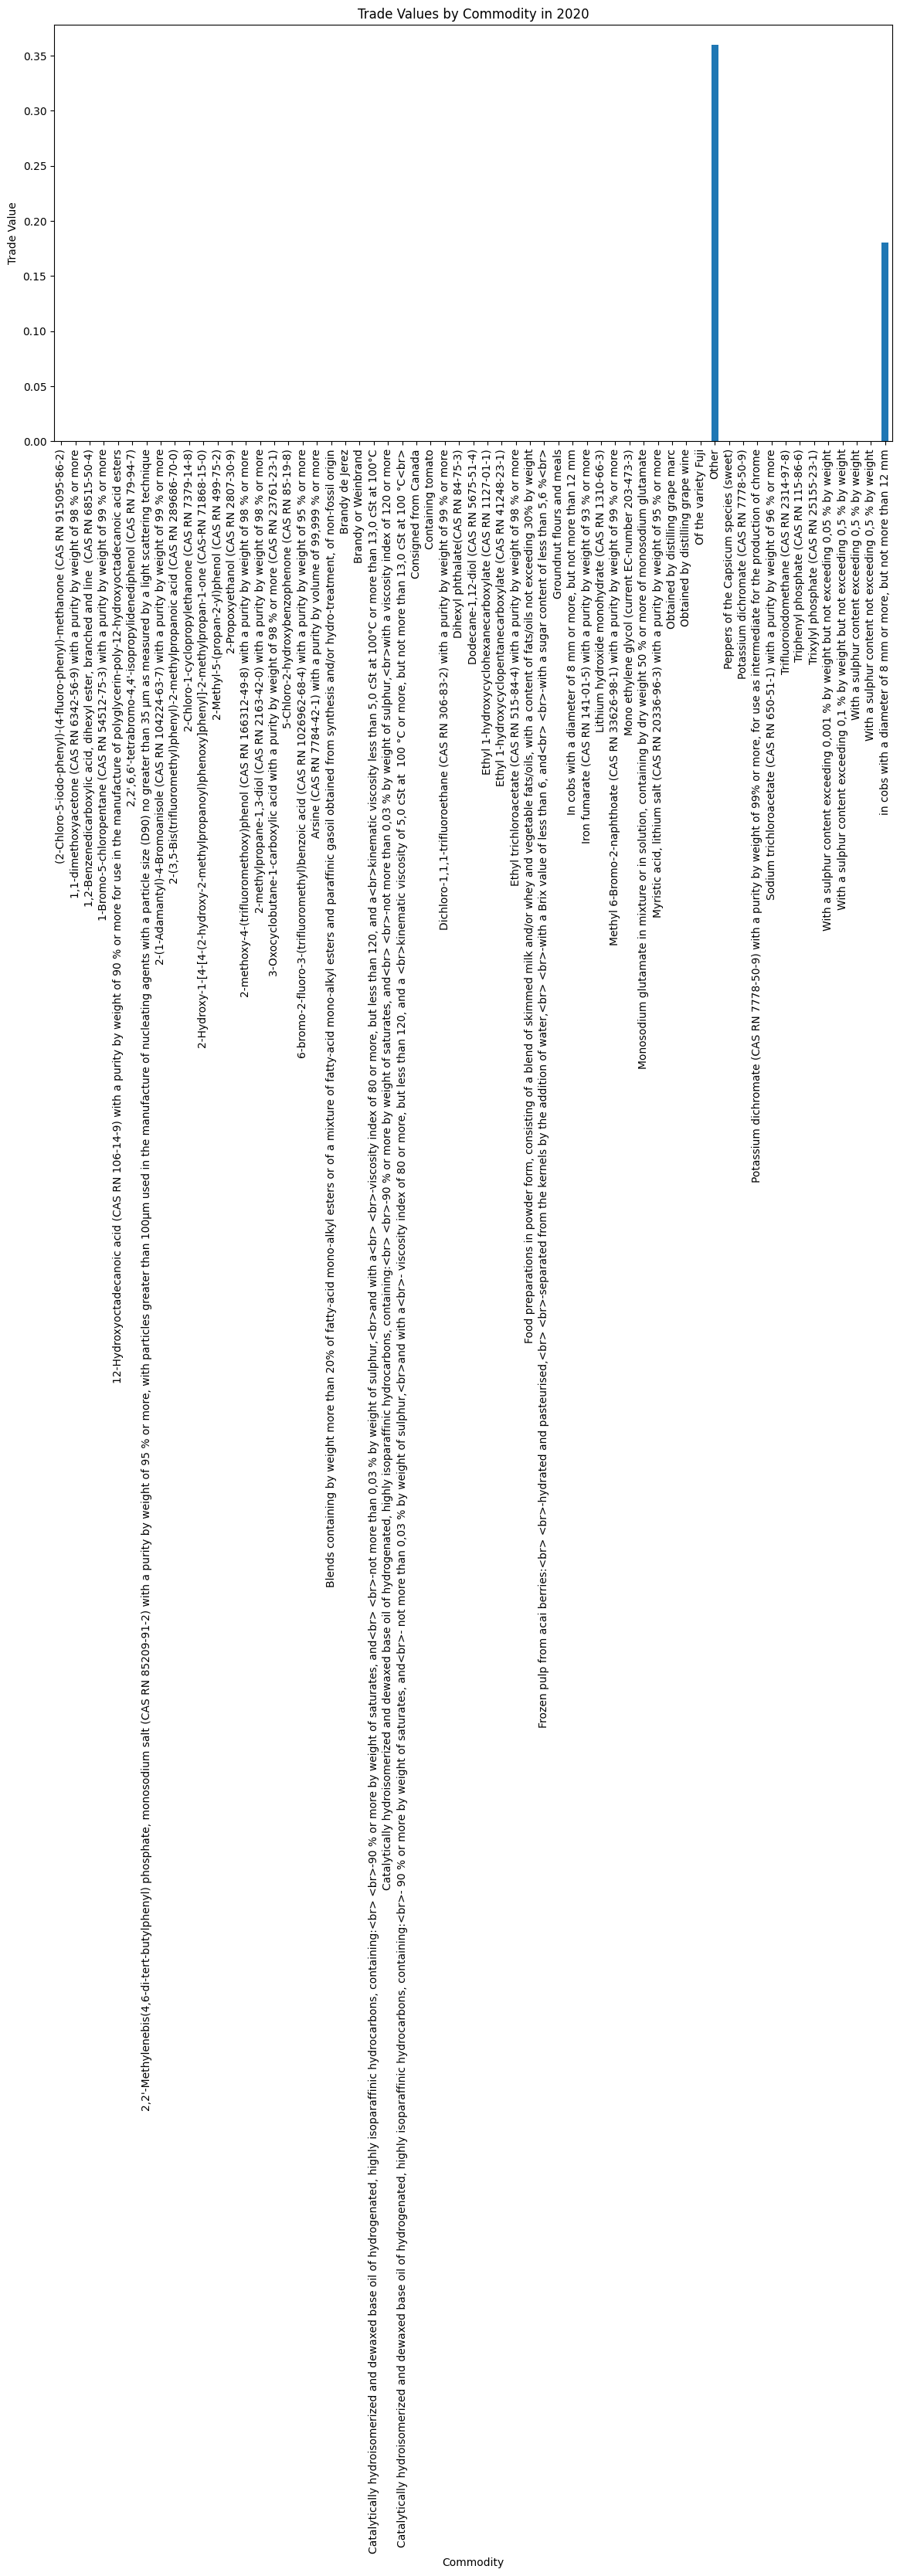

In [ ]:
# 2. Bar Chart: Compare trade values of different commodities for a specific year
specific_year = 2020
year_data = MFN_africa_trade[MFN_africa_trade['commodity__validity_year'].dt.year == specific_year]
commodity_trade_value = year_data.groupby('commodity__description')['measure__duty_expression'].sum()

plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='bar')
plt.title(f'Trade Values by Commodity in {specific_year}')
plt.xlabel('Commodity')
plt.ylabel('Trade Value')
plt.xticks(rotation=90)
plt.show()

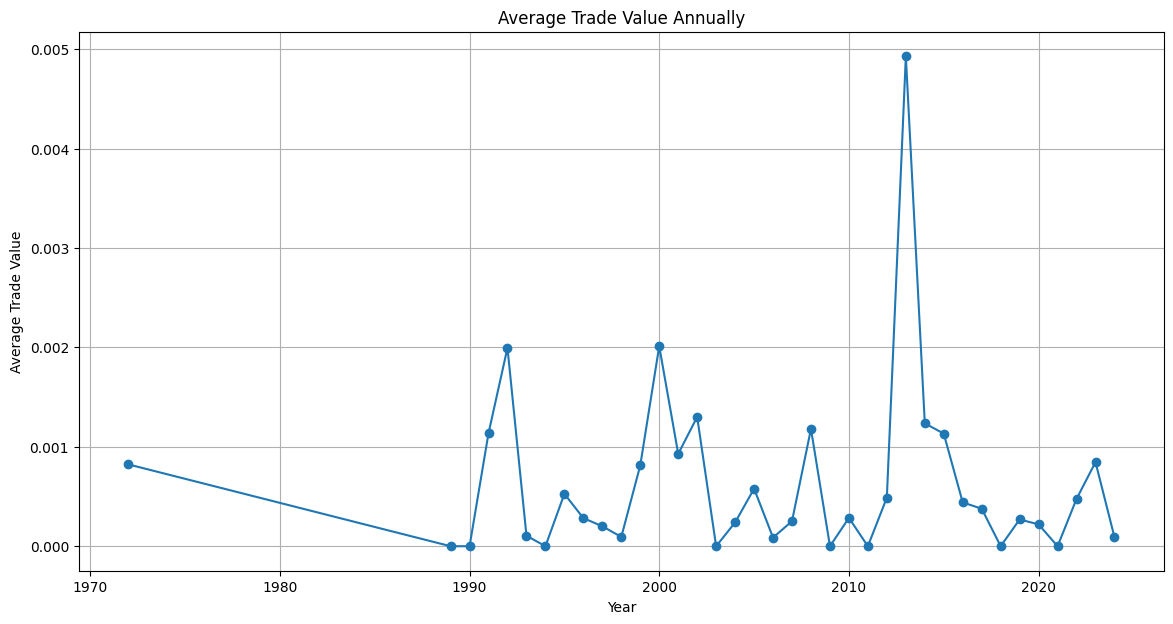

In [ ]:
annual_avg_trade_value = MFN_africa_trade.groupby('commodity__validity_year')['measure__duty_expression'].mean()

# Plot the average trade value annually
plt.figure(figsize=(14, 7))
plt.plot(annual_avg_trade_value.index, annual_avg_trade_value.values, marker='o')
plt.title('Average Trade Value Annually')
plt.xlabel('Year')
plt.ylabel('Average Trade Value')
plt.grid(True)
plt.show()

In [ ]:

MFN_africa_trade['commodity__description'].value_counts().head(11)

commodity__description
Other                                                                                                                                                                      48988
Of an actual alcoholic strength by volume not exceeding 13 % vol                                                                                                            2439
Consigned from Canada                                                                                                                                                       2347
Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol                                                                                     2220
Powdered                                                                                                                                                                    2038
Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol     

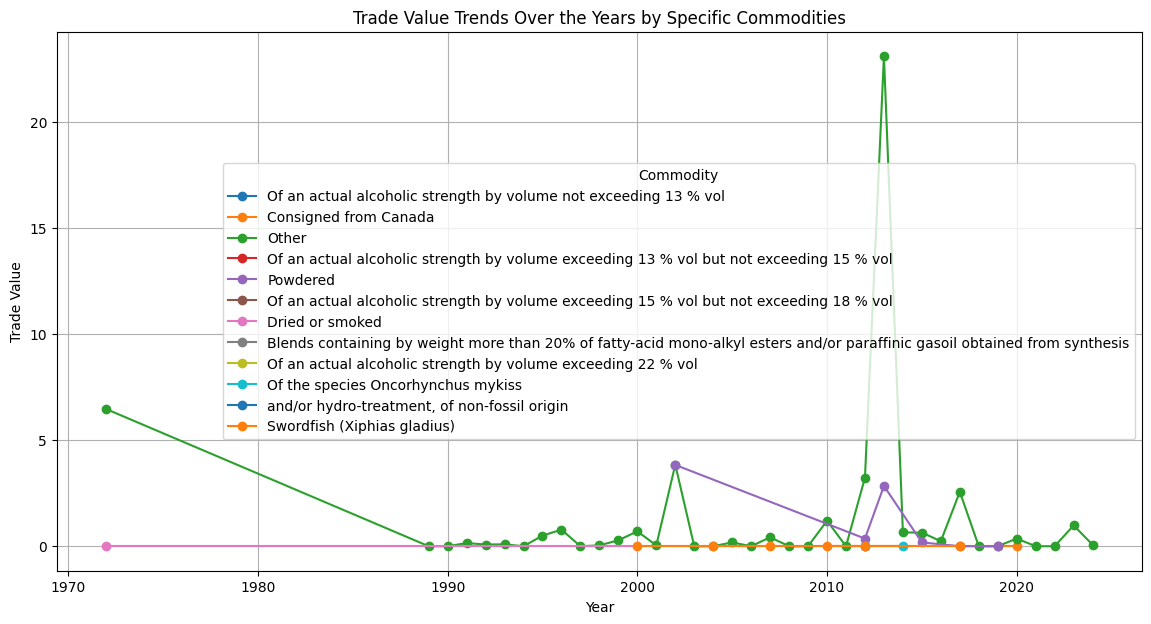

In [ ]:
# List of specific commodities to analyze
commodities_to_analyze = ['Of an actual alcoholic strength by volume not exceeding 13 % vol', 'Consigned from Canada', 'Other', 'Of an actual alcoholic strength by volume exceeding 13 % vol but not exceeding 15 % vol', 'Powdered', 'Of an actual alcoholic strength by volume exceeding 15 % vol but not exceeding 18 % vol', 'Dried or smoked', 'Blends containing by weight more than 20% of fatty-acid mono-alkyl esters and/or paraffinic gasoil obtained from synthesis', 'Of an actual alcoholic strength by volume exceeding 22 % vol', 'Of the species Oncorhynchus mykiss', 'and/or hydro-treatment, of non-fossil origin', 'Swordfish (Xiphias gladius)']

# Filter data for specific commodities
filtered_df = MFN_africa_trade[MFN_africa_trade['commodity__description'].isin(commodities_to_analyze)]

# 1. Line Chart: Trade value trends over the years for each specific commodity
plt.figure(figsize=(14, 7))
for commodity in commodities_to_analyze:
    commodity_data = filtered_df[filtered_df['commodity__description'] == commodity]
    annual_trade_value = commodity_data.groupby(commodity_data['commodity__validity_year'].dt.year)['measure__duty_expression'].sum()
    plt.plot(annual_trade_value.index, annual_trade_value.values, marker='o', label=commodity)
plt.title('Trade Value Trends Over the Years by Specific Commodities')
plt.xlabel('Year')
plt.ylabel('Trade Value')
plt.legend(title='Commodity')
plt.grid(True)
plt.show()

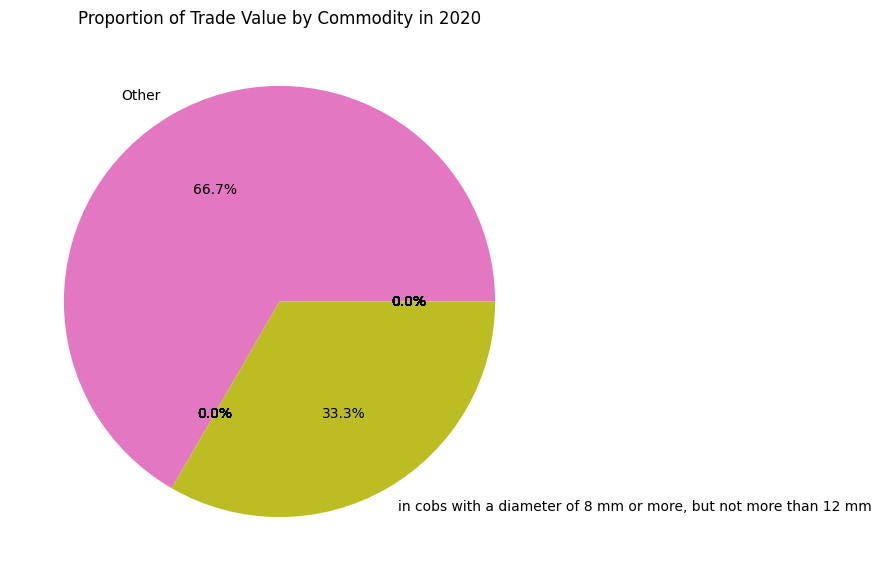

In [ ]:
# Plot 3: Pie Chart - Proportion of trade value by commodity for a specific year
plt.figure(figsize=(14, 7))
commodity_trade_value.plot(kind='pie', autopct='%1.1f%%')
plt.title(f'Proportion of Trade Value by Commodity in {specific_year}')
plt.ylabel('')
plt.show()

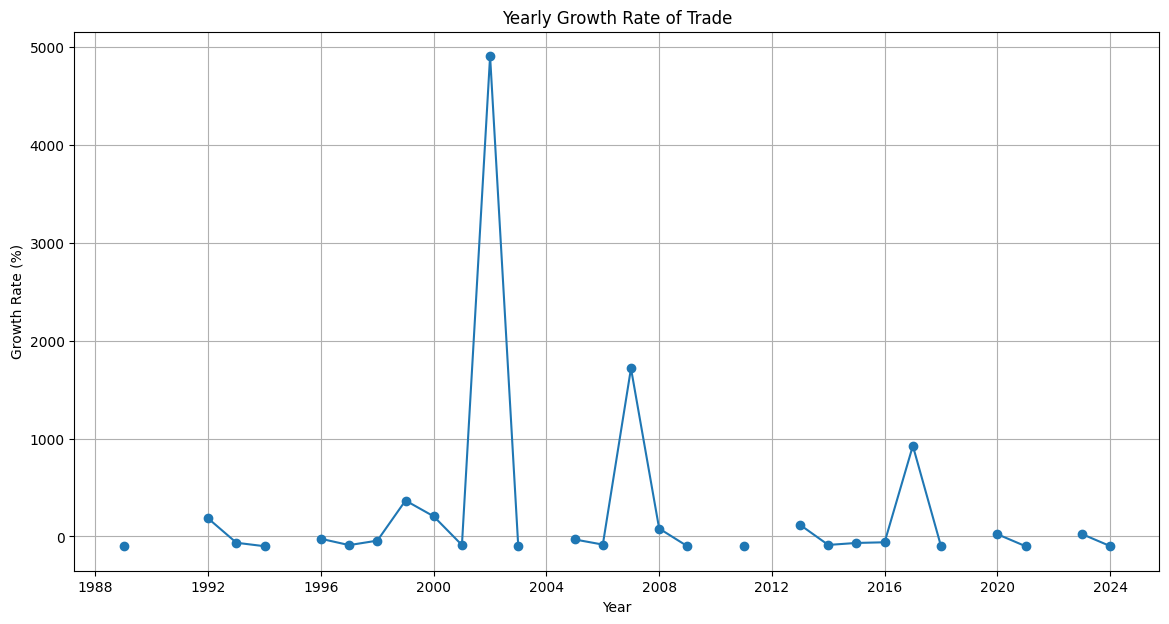

In [ ]:
# Calculate the annual trade value
annual_trade_value = MFN_africa_trade.groupby('commodity__validity_year')['measure__duty_expression'].sum()

# Calculate the yearly growth rate
annual_growth_rate = annual_trade_value.pct_change() * 100

# Plot the yearly growth rate
plt.figure(figsize=(14, 7))
plt.plot(annual_growth_rate.index, annual_growth_rate.values, marker='o')
plt.title('Yearly Growth Rate of Trade')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.grid(True)
plt.show()

# ***Objective 1: Predict Trade Volume Based on Tariff Rates for Africa Trade***

In [ ]:
X = MFN_africa_trade.drop(columns=['measure__duty_expression'])
y = MFN_africa_trade['measure__duty_expression']

In [ ]:
# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

In [ ]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [ ]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Define and train the model
models = {
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}
results = {}
confusion_matrices = {}
accuracies = {}


In [ ]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description']

for column in categorical_columns:
    le = LabelEncoder()
    MFN_africa_trade[column] = le.fit_transform(MFN_africa_trade[column])
    label_encoders[column] = le


In [ ]:
# Encode categorical variables
for column in categorical_columns:
    le = LabelEncoder()
    MFN_africa_trade[column] = le.fit_transform(MFN_africa_trade[column])

# Select features and target
X = MFN_africa_trade.drop(['measure__duty_expression'], axis=1)
y = MFN_africa_trade['measure__duty_expression']

# Identify datetime columns
datetime_cols = X.select_dtypes(include=['datetime64']).columns

# Convert datetime columns to numerical features (e.g., Unix timestamp)
for col in datetime_cols:
    X[col] = (X[col] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1s')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regression': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Train and evaluate the models
results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)


    results[name] = {'Mean Squared Error': mse, 'R^2 Score': r2}
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,R^2 Score
Linear Regression,0.000059,0.043937
Random Forest Regression,0.000004,0.929548
Gradient Boosting Regression,0.000028,0.551397


# ***Objective 2: Classify Commodities Based on Tariff Categories for Africa Trade***

In [ ]:
# Encode categorical columns using LabelEncoder
label_encoders = {}
categorical_columns = ['measure__type__description', 'commodity__suffix',
                       'commodity__validity_start', 'commodity__description',
                       'measure__geographical_area__description', 'measure__duty_expression']

for column in categorical_columns:
    le = LabelEncoder()
    MFN_africa_trade[column] = le.fit_transform(MFN_africa_trade[column])
    label_encoders[column] = le

In [ ]:
# Features and target variable
X = MFN_africa_trade.drop(columns=['commodity__suffix'])
y = MFN_africa_trade['commodity__suffix']

In [ ]:
# Convert X_train and X_test to pandas DataFrames if they are NumPy arrays
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)
if isinstance(X_test, np.ndarray):
    X_test = pd.DataFrame(X_test)

# Assuming 'date_column' is the name of your datetime column
# Replace with the actual name(s) of your datetime column(s)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].view('int64') // 10 ** 9  # Convert to Unix timestamp (seconds)

# Do the same for X_test
for col in X_test.select_dtypes(include=['datetime64']).columns:
    X_test[col] = X_test[col].view('int64') // 10 ** 9

In [ ]:
# Replace with the actual name(s) of your datetime column(s)
for col in X_train.select_dtypes(include=['datetime64']).columns:
    X_train[col] = X_train[col].view('int64') // 10 ** 9  # Convert to Unix timestamp (seconds)

# Do the same for X_test
for col in X_test.select_dtypes(include=['datetime64']).columns:
    X_test[col] = X_test[col].view('int64') // 10 ** 9

In [ ]:
# Replace with the actual name(s) of your datetime column(s)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].view('int64') // 10 ** 9

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split the data into training and tMFN_africa_tradeesting sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {accuracy_dt}')
confusion_matrix_dt = confusion_matrix(y_test, y_pred_dt)

Decision Tree Accuracy: 0.9998352437216089


In [ ]:
# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
confusion_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_knn = accuracy_score(y_test, y_pred_rf)
conf_matrix_knn = confusion_matrix(y_test, y_pred_rf)
print(f'Random Forest model Accuracy: {accuracy_knn * 100}')

Random Forest model Accuracy: 99.77640219361217


In [ ]:
# Train the k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print(f'k-NN Accuracy: {accuracy_knn * 100}')

k-NN Accuracy: 84.58351966483866


In [ ]:
# Store confusion matrices in a dictionary for easy display
confusion_matrices = {
    'Decision Tree': confusion_matrix_dt,
    'k-NN': confusion_matrix_knn,
    'RF': confusion_matrix_rf
}

In [ ]:
for name, matrix in confusion_matrices.items():
    print(f"{name} Confusion Matrix:\n{matrix}\n")

Decision Tree Confusion Matrix:
[[ 7383     0     0     0     3]
 [    0  1136     0     0     0]
 [    0     0   198     0     0]
 [    0     0     0    17     0]
 [    4     0     0     0 33746]]

k-NN Confusion Matrix:
[[ 3664   137    17     2  3566]
 [  271   468    31     0   366]
 [   44    32    63     2    57]
 [   10     3     2     2     0]
 [ 1807   178    23     2 31740]]

RF Confusion Matrix:
[[ 7332     0     0     0    54]
 [    0  1136     0     0     0]
 [    0     0   198     0     0]
 [    0     0     0    17     0]
 [   41     0     0     0 33709]]



In [ ]:

def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print evaluation metrics
    print(f"{model_name} Model Evaluation:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Plot confusion matrix
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Decision Tree Model Evaluation:
Precision: 0.9998
Recall: 0.9998
F1 Score: 0.9998


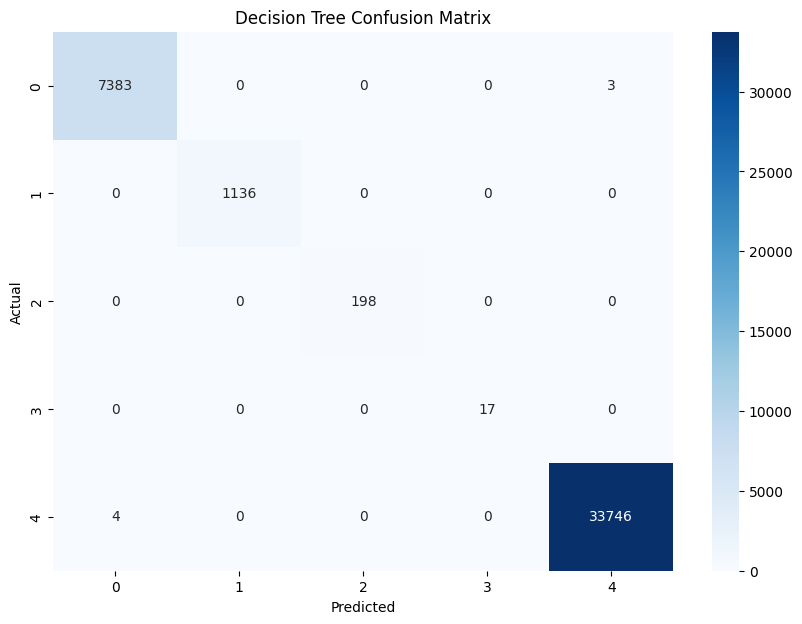

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, X_train, X_test, y_train, y_test, 'Decision Tree')

Random Forest Model Evaluation:
Precision: 0.9978
Recall: 0.9978
F1 Score: 0.9978


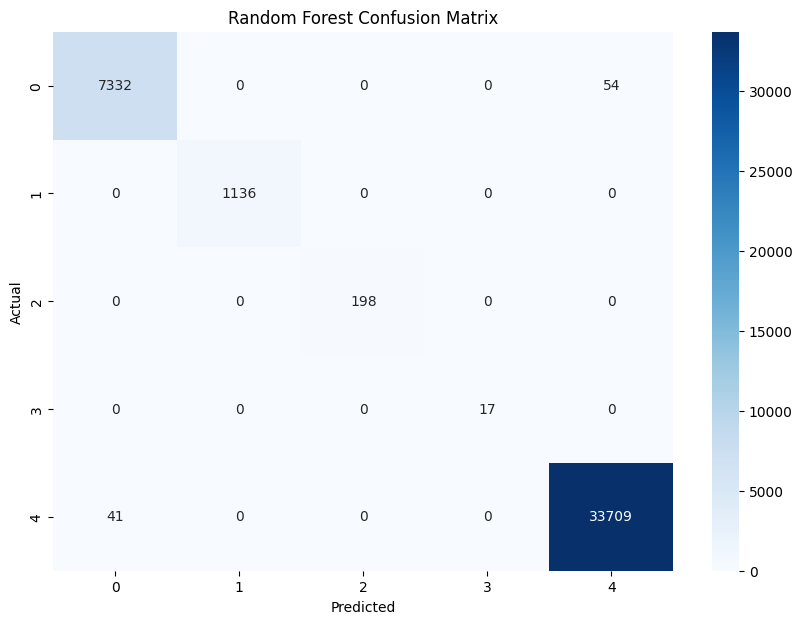

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, X_train, X_test, y_train, y_test, 'Random Forest')

k-NN Model Evaluation:
Precision: 0.8331
Recall: 0.8458
F1 Score: 0.8370


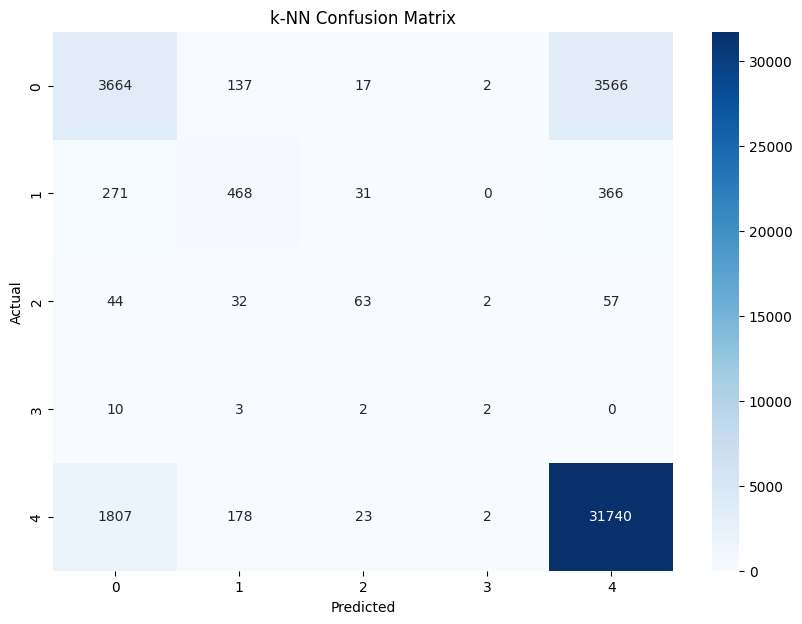

In [ ]:
knn_model = KNeighborsClassifier()
evaluate_model(knn_model, X_train, X_test, y_train, y_test, 'k-NN')

# ***Objective 3: Cluster Commodities with Similar Tariff Structures for Africa Trade***

In [ ]:
cols = ['commodity__code','measure__duty_expression']
MFN_africa_trade1 =  MFN_africa_trade[cols]

In [ ]:
WCSS = []
for i in range(1,10):
  kn = KMeans(n_clusters=i)
  kn.fit(MFN_africa_trade1)
  WCSS.append(kn.inertia_)

In [ ]:
WCSS

[3.937653399771738e+23,
 9.16039454024935e+22,
 1.3658131733500148e+22,
 8.720195432294001e+21,
 4.3792535458052015e+21,
 1.8937792844142454e+21,
 1.309937855495357e+21,
 9.9602473888963e+20,
 7.337328603780126e+20]

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

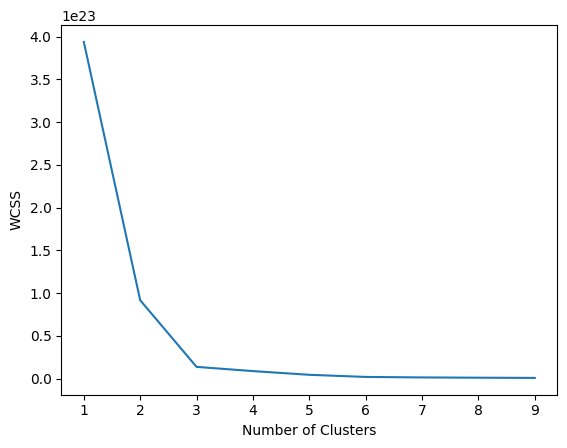

In [ ]:
plt.plot(range(1,10),WCSS)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt

In [ ]:
x = MFN_africa_trade1.iloc[:,:].values
km = KMeans(n_clusters=3)
y_mean = km.fit_predict(x)

In [ ]:
y_mean

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

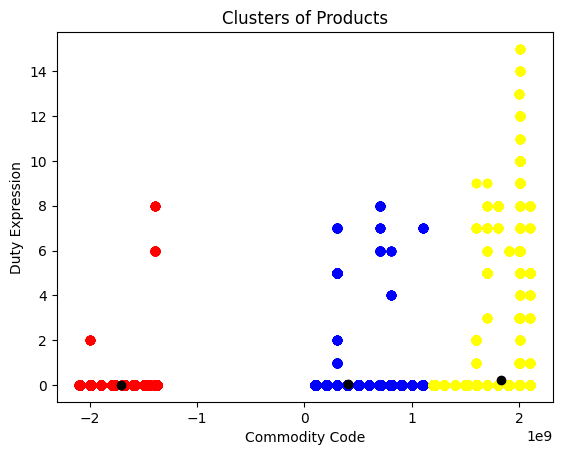

In [ ]:
plt.scatter(x[y_mean == 0,0],x[y_mean == 0,1], color = 'red')
plt.scatter(x[y_mean == 1,0],x[y_mean == 1,1], color = 'blue')
plt.scatter(x[y_mean == 2,0],x[y_mean == 2,1], color = 'yellow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black')
plt.title('Clusters of Products')
plt.xlabel('Commodity Code')
plt.ylabel('Duty Expression')
plt.show()

# ***4. Forecast Future Tariff Rates and Trade Volumes for Africa Trade***

In [ ]:
# Select relevant features
selected_columns = [
    'commodity__code',
    'measure__geographical_area__description',
    'measure__duty_expression',
    'commodity__validity_start'
]

In [ ]:
MFN_africa_trade_selected = MFN_africa_trade[selected_columns]

In [ ]:
# Preprocessing
MFN_africa_trade['commodity__validity_start'] = pd.to_datetime(MFN_africa_trade['commodity__validity_start'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
label_encoder = LabelEncoder()
scaler = MinMaxScaler()
MFN_africa_trade['measure__geographical_area__description'] = label_encoder.fit_transform(MFN_africa_trade['measure__geographical_area__description'])
MFN_africa_trade[['commodity__code', 'measure__duty_expression']] = scaler.fit_transform(MFN_africa_trade[['commodity__code', 'measure__duty_expression']])
MFN_africa_trade.sort_values('commodity__validity_start', inplace=True)

In [ ]:
# Prepare data for LSTM
sequence_length = 10
def create_sequences(MFN_africa_trade, seq_length):
    xs, ys = [], []
    for i in range(len(MFN_africa_trade) - seq_length):
        x = MFN_africa_trade[i:i+seq_length]
        y = MFN_africa_trade[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

model_data = MFN_africa_trade[['commodity__code', 'measure__geographical_area__description', 'measure__duty_expression']].values
X, y = create_sequences(model_data, sequence_length)

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build and train the improved LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(sequence_length, 3)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/10
2125/2125 [==============================] - 130s 54ms/step - loss: 1.2764 - val_loss: 1.0422 - lr: 0.0010
Epoch 2/10
2125/2125 [==============================] - 103s 48ms/step - loss: 1.0531 - val_loss: 0.9712 - lr: 0.0010
Epoch 3/10
2125/2125 [==============================] - 111s 52ms/step - loss: 1.0067 - val_loss: 0.9431 - lr: 0.0010
Epoch 4/10
2125/2125 [==============================] - 104s 49ms/step - loss: 0.9785 - val_loss: 0.9304 - lr: 0.0010
Epoch 5/10
2125/2125 [==============================] - 96s 45ms/step - loss: 0.9565 - val_loss: 0.9101 - lr: 0.0010
Epoch 6/10
2125/2125 [==============================] - 115s 54ms/step - loss: 0.9386 - val_loss: 0.8944 - lr: 0.0010
Epoch 7/10
2125/2125 [==============================] - 104s 49ms/step - loss: 0.9252 - val_loss: 0.8813 - lr: 0.0010
Epoch 8/10
2125/2125 [==============================] - 99s 47ms/step - loss: 0.9122 - val_loss: 0.8726 - lr: 0.0010
Epoch 9/10
2125/2125 [==============================] - 10

In [ ]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

1328/1328 [==============================] - 25s 19ms/step - loss: 0.8848
Test Loss: 0.8847637176513672


In [ ]:
# Make predictions
predictions = model.predict(X_test)

1328/1328 [==============================] - 28s 16ms/step


In [ ]:
# Example: Display the first 5 predictions and actual values
for i in range(5):
    print(f'Prediction: {predictions[i]}, Actual: {y_test[i]}')

Prediction: [0.9809977  1.1655492  0.00676483], Actual: [0.97645432 0.         0.        ]
Prediction: [ 0.5732288   0.5360057  -0.00085858], Actual: [0.54684126 1.         0.        ]
Prediction: [0.64205796 3.893859   0.00673192], Actual: [0.66744243 5.         0.        ]
Prediction: [ 0.6779804   0.4369713  -0.00136418], Actual: [0.69112829 0.         0.        ]
Prediction: [0.49727696 5.907322   0.01271109], Actual: [0.64196964 5.         0.        ]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Calculate MAE, RMSE, and MAPE
def calculate_metrics(predictions, actuals):
    mae = np.mean(np.abs(predictions - actuals))
    rmse = np.sqrt(np.mean((predictions - actuals) ** 2))

    # Handling division by zero in MAPE calculation
    non_zero_actuals = np.where(actuals != 0, actuals, np.nan)
    mape = np.nanmean(np.abs((predictions - non_zero_actuals) / non_zero_actuals)) * 100

    return mae, rmse, mape

In [ ]:
mae, rmse, mape = calculate_metrics(predictions, y_test)
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')

MAE: 0.3678236443790923
RMSE: 0.9406185388530361
MAPE: 452.2155061639713%
